In [1]:
import sys
import numpy as np
import pytesseract
import skimage as ski

In [2]:
sys.path.append("/home/ubuntu/GIT_REPO/Users/sayantani/UnstructuredDataAPI/src")

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

/home/ubuntu/anaconda3/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.6.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
import unstructured_data_api
import matplotlib.pyplot as plt

from unstructured_data_api.image.loadFunc import *
from unstructured_data_api.image.basic_manipulation import *
from unstructured_data_api.image.thresholding import *
from unstructured_data_api.image.smoothing import *
from unstructured_data_api.image.contour import *

In [5]:
FILE_NAME = "Report 1.pdf"

images = loadPDFInGrayScale(f"/home/ubuntu/case_3/{FILE_NAME}", 
                            f"/home/ubuntu/data/extracted_images/{FILE_NAME}")

In [6]:
image = np.array(images[0])

In [7]:
crop.get_dimensions(image)

(2339, 1654)

In [8]:
original = image.copy()

In [9]:
mask = np.ones(shape=original.shape[0:2], dtype="bool")

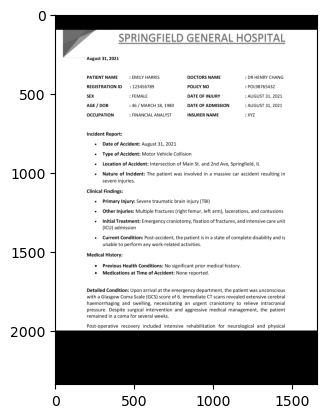

In [10]:
temp = image.copy()

rr, cc = ski.draw.rectangle(start=(100, 0), end=(2000, 1653))

mask[rr, cc] = False

temp[mask] = 0

plt.imshow(temp, cmap='gray')

In [11]:
histogram, bin_edges = np.histogram(original, bins=256, range=(0, 255))

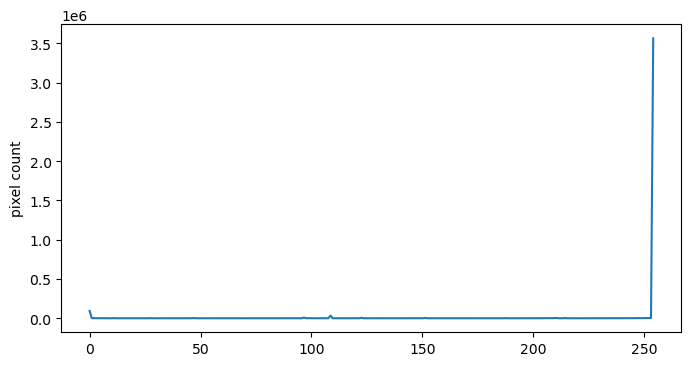

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.set_ylabel("pixel count")

ax.plot(bin_edges[0:-1], histogram)

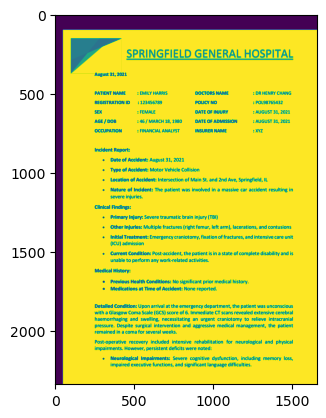

In [13]:
plt.imshow(scaling.shift_img(np.array(images[0]), 50, 100))

#### Blurring

Text(0.5, 1.0, 'Original')

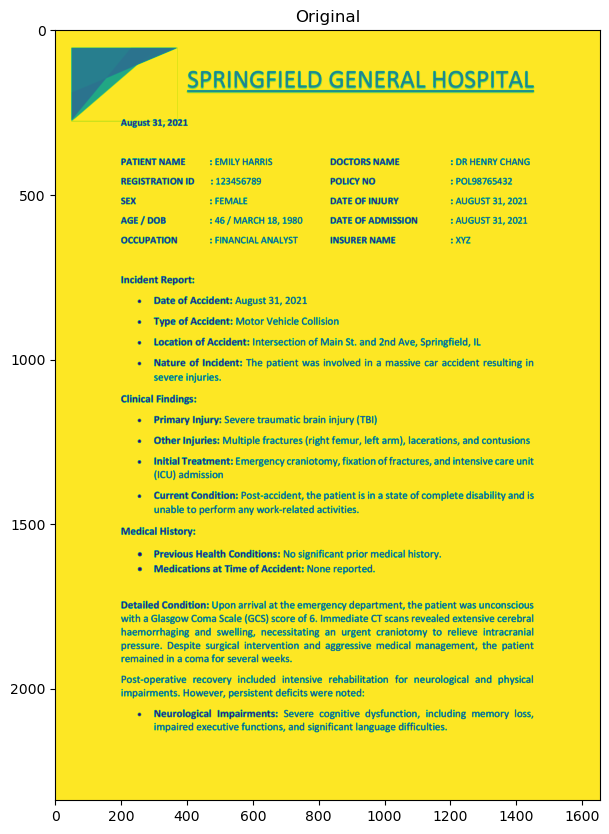

In [14]:
f, (ax1) = plt.subplots(1, figsize=(8, 10))

ax1.imshow(original, vmin=0, vmax=255)
ax1.set_title("Original")

Text(0.5, 1.0, 'Average Blur')

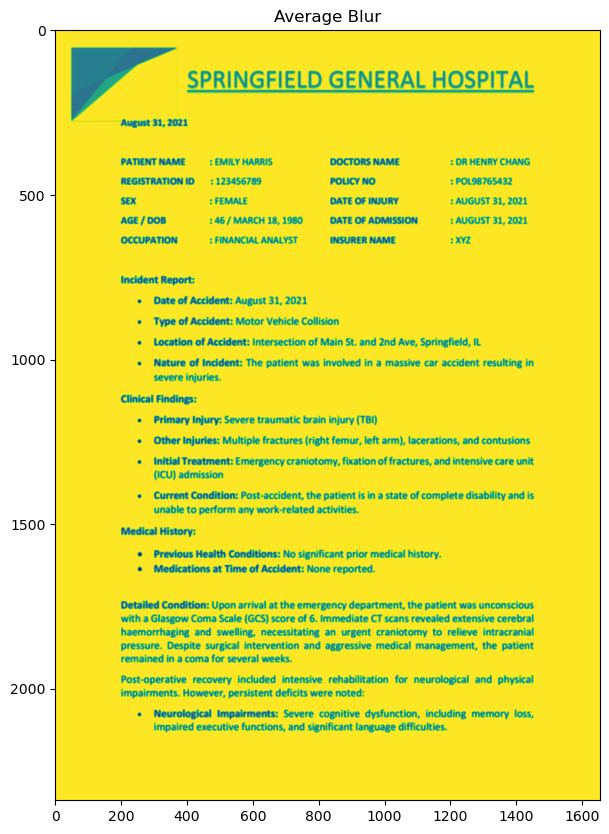

In [15]:
f, (ax1) = plt.subplots(1, figsize=(8, 10))

ax1.imshow(average_blur(original), vmin=0, vmax=255)
ax1.set_title("Average Blur")

Text(0.5, 1.0, 'Gaussian Blur')

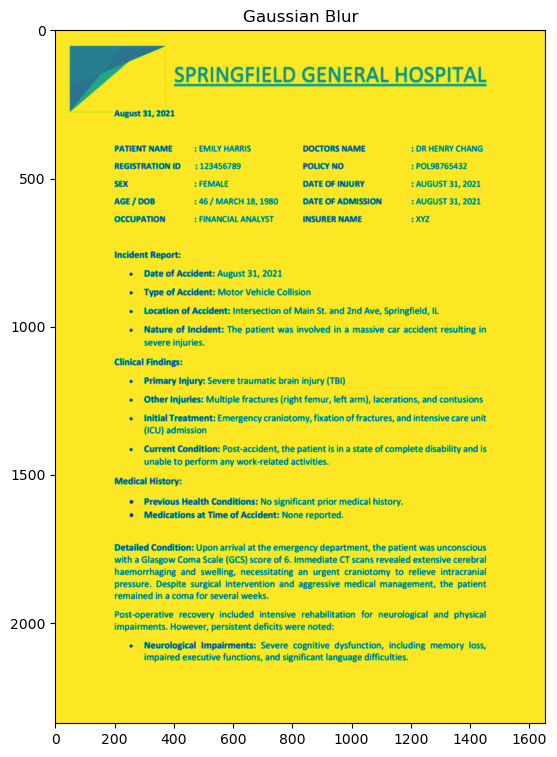

In [16]:
f, (ax1) = plt.subplots(1, figsize=(8, 9))

ax1.imshow(gaussian_blur(original), vmin=0, vmax=255)
ax1.set_title("Gaussian Blur")

Text(0.5, 1.0, 'Median Blur')

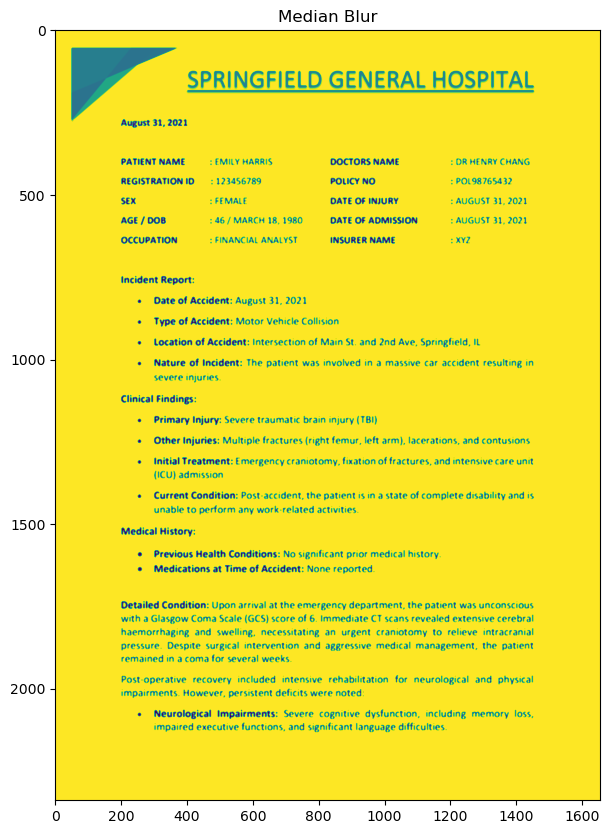

In [17]:
f, (ax1) = plt.subplots(1, figsize=(8, 10))

ax1.imshow(median_blur(original), vmin=0, vmax=255)
ax1.set_title("Median Blur")

Text(0.5, 1.0, 'Bilateral Blur')

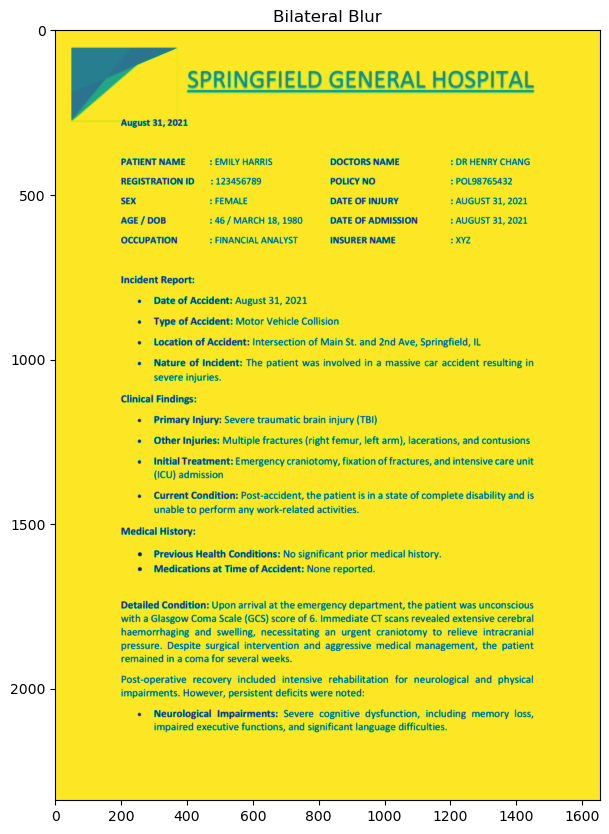

In [18]:
f, (ax1) = plt.subplots(1, figsize=(8, 10))

ax1.imshow(bilateral_filter(original), vmin=0, vmax=255)
ax1.set_title("Bilateral Blur")

#### Thresholding

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 2, figsize=(8, 10))

ax1.imshow(bilateral_filter(original), vmin=0, vmax=255)
ax1.set_title("Thresh Binary")

In [ ]:
blur = gaussian_blur(original)
thresh = thresh_otsu(blur)[1]

In [ ]:
# element = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))

# erosion_dst = cv2.erode(image_thresh, element)

#### After Contours

In [ ]:
contours, hierarchy = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    
    cv2.rectangle(convertedImg, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
plt.imshow(convertedImg)

In [ ]:
rawImage = cv2.drawContours(originalImage, contours, -1, (0, 255, 0), 1)

# for i in range(len(contours)):
#     rawImage = cv2.drawContours(originalImage, [contours[i]], 0, (0, 255, 0), 1)

In [ ]:
plt.imshow(originalImage, 'gray')

In [ ]:
cv2.imwrite(f"/home/ubuntu/data/extracted_images/contoured.jpeg", rawImage)

In [ ]:
image_text = image_to_text.image_to_text(thresh_binary(scaled_image)[1])

In [ ]:
image_text.split('\n+')[0].split('\n')

In [ ]:
doc = nlp(image_text.split('\n+')[0])

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_)
    
print("********")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
pytesseract.image_to_string(images[0], config='--psm 6').split('\n')

In [ ]:
#pytesseract.image_to_string(thresh_otsu(crop.square_resize(images[1]))[1], config='--psm 6').split('\n')